## K-Nearest Neighbor algorithm - python code from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random_seed = 123

In [3]:
class Knn:
    
    def __init__(self,n_nearest_neighbors:int):
        self.n_nearest_neighbors = n_nearest_neighbors
    
    def fit(self,X:np.array,y:np.array):
        # First step is for KNN is to store input data. No other training is performed. 
        self.train_data_x = X
        self.train_data_y = y
        
    # Prediction function
    def predict(self,test_data_x:np.array):
        # Step 1: Get nearest neighbors
        top_k_predictions = np.zeros([np.shape(test_data_x)[0],self.n_nearest_neighbors])
        row_counter = 0
        for each_row in test_data_x:
            #Step 1.1: Calculate the Euclidean distance
            distance_val = np.sqrt(((each_row - self.train_data_x)**2).sum(axis=1))
            
            #Step 1.2: Select the K nearest neighbors
            row_indices = np.argsort(distance_val)
            
            top_k_indices = row_indices[0:self.n_nearest_neighbors]

            #Step 2:  Get the predictions for each test data based on the nearest neighbors
            top_k_predictions[row_counter,:] = self.train_data_y[top_k_indices]
            row_counter = row_counter + 1

        
        #Step 3: Select the label with majority voting
        final_predictions = []
        for each_row in top_k_predictions:
            final_predictions = np.append(final_predictions,np.bincount(each_row.astype(int)).argmax())
        return final_predictions
        
        
        

#### Additional section

## K-Nearest Neighbor algorithm - metrics to assess the model performance (using sklearn)

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [5]:
# Create synthetic dataset to test knn
num_samples = 1000
num_features = 4
num_classes = 2
X, y = make_classification(n_samples = num_samples, n_features =  num_features, n_informative = 4, n_redundant = 0,
                           n_classes = num_classes)


In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = random_seed)

In [7]:
nearest_neighbors_cnt = 5
knn_obj = Knn(nearest_neighbors_cnt)
knn_obj.fit(train_x,train_y)

In [8]:
predicted_y = knn_obj.predict(test_x)

[[0.91578947 0.08421053]
 [0.06666667 0.93333333]]


Text(0, 0.5, 'Actual')

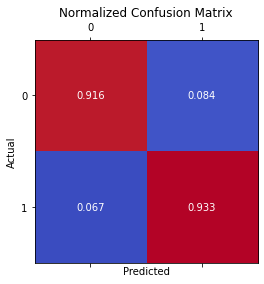

In [9]:
# Create confusion matrix
norm_confusion_mat = confusion_matrix(test_y,predicted_y,normalize='true')
print(norm_confusion_mat)

# Plot confusion matrix
plt.matshow(norm_confusion_mat, cmap='coolwarm')
for (i,j), z in np.ndenumerate(norm_confusion_mat):
    plt.text(j, i, '{:0.3f}'.format(z), ha='center', va='center', color = 'w')

plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [10]:
# Precision - TP/(TP+FP)
precision = precision_score(test_y,predicted_y)
print("precision score is:", precision)

# Recall (True Positve Rate) - TP/(TP+FN)
recall = recall_score(test_y,predicted_y)
print("recall score is:", recall)

precision score is: 0.9245283018867925
recall score is: 0.9333333333333333


In [11]:
accuracy = accuracy_score(test_y,predicted_y)
print("accuracy score is:", accuracy)

accuracy score is: 0.925


In [13]:
f1 = f1_score(test_y,predicted_y)
print("f1 score is:", f1)

f1 score is: 0.9289099526066351
